# JUPYTER NOTEBOOK FOR HOMEWORK 2
Segment the foreground from one image and transfer it to another image

In [111]:
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from makeLMfilters import makeLMfilters
from sklearn.cluster import KMeans
import scipy

In [342]:
#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(filename):
        img = mpimg.imread(filename)
    return img


#Convert the image to grayscale


#   Define a function segmentImg which takes in an image and returns the foreground labels
#   The arguments to segmentImg are imgFilename
#   and k (the number of clusters)
def segmentImg(imgFilename, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    '****Put your code here.'
    foreground = load_img(imgFilename)
    original_image = foreground
    foreground = skimage.color.rgb2gray(foreground)

#     plt.imshow(foreground)  
    
    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    #
    '****Put your code here.'
    F = makeLMfilters()

    #3. Convolve the input image with every filter in the bank of filters 
    #   to get a response array 
    #
    '****Put your code here.'
    response = np.zeros([foreground.shape[0], foreground.shape[1], 48])
    for index in range(F.shape[-1]):
        response[...,index] = scipy.ndimage.convolve(foreground, F[...,index])

    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    '****Put your code here.'
    response = np.absolute(response)
    response = response.reshape((response.shape[0]*response.shape[1]), 48)
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    #  
    '****Put your code here.'
    labels = KMeans(n_clusters=k, random_state=0).fit(response)
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    idx = labels.labels_.reshape(foreground.shape)
    
    
    print('***Segmentation done***')
    return original_image, idx

In [152]:
"""
You are now given a second function tansferImg with the arguments:
    fgs: foreground label ids from clustering
    idxImg: the reshaped indexed image also from clustering
    sImgFilename: source image (a color image to pick pixels from)
    tImgFilename: target image (also a color image to transfer pixels to)
    This function is customized to work for the images provided for the homework
"""
def transferImg(fgs, idxImg, sImgFilename, tImgFilename):

    # Read the images, estimate their dimensions
    sImg = skimage.io.imread(sImgFilename)
    tImg = skimage.io.imread(tImgFilename)
    rows, cols, clrs = sImg.shape

    # Crop the source and indexed images
    idxImg = idxImg[25:rows-25, 25:cols-25]
    sImg = sImg[25:rows-25, 25:cols-25]
    rows, cols, clrs = sImg.shape
    
    # Resize them by so they fit in target file, tImg
    idxImg = resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True, preserve_range=True)
    idxImg = idxImg.astype(np.uint8)
    sImg = resize(sImg, (int(sImg.shape[0]/1.5), int(sImg.shape[1]/1.5)), anti_aliasing=True, preserve_range=True)
    sImg = sImg.astype(np.uint8)
    rows, cols, clrs = sImg.shape
    
    # Transfer idx onto tImg
    for i in range(rows): 
        for j in range(cols):
            if idxImg[i,j] in fgs:
                # Coordinate offsets from boundary
                iOff = i+200
                jOff = j+100 
                tImg[iOff,jOff,0] = sImg[i,j,0]
                tImg[iOff,jOff,1] = sImg[i,j,1]
                tImg[iOff,jOff,2] = sImg[i,j,2]

    print('***transfer done')
    plt.imshow(tImg)
    plt.show()
    return tImg


In [458]:
#7. Test your segmentation function with an image file and # of clusters, k
# Below is an example of how to call the transfer function
#

original_image, idx = segmentImg('images/gecko.jpg', 9)

***Segmentation done***


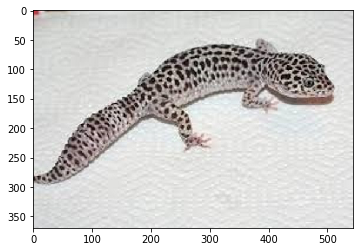

In [459]:
plt.imshow(original_image)

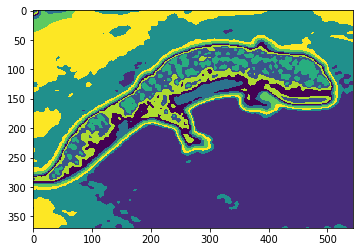

In [460]:
plt.imshow(idx)

***transfer done


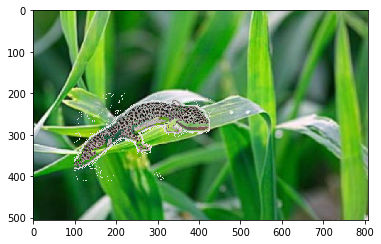

In [470]:
# Insert only the numbers that correspond to the foreground labels in the transferImg function
trImg = transferImg([1,2,4,5,6,8], idx, 'images/gecko.jpg', 'images/bg2.jpg')

In [ ]:
### 8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClr(imgFilename, k, color=''):
    '****Put your code here.'
    #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    '****Put your code here.'
    foreground = load_img(imgFilename)
    original_shape = foreground.shape
    if color == 'hsv':
        foreground = skimage.color.rgb2hsv(foreground)
    elif color == 'lab':
        foreground = skimage.color.rgb2lab(foreground)

    foreground = foreground.reshape(-1, foreground.shape[-1])
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    #  
    '****Put your code here.'
    labels = KMeans(n_clusters=k, random_state=0).fit(foreground)
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    idx = labels.labels_.reshape(original_shape[:2])
    
    print('***Segmentation done***')
    return idx

***Segmentation done***
***transfer done


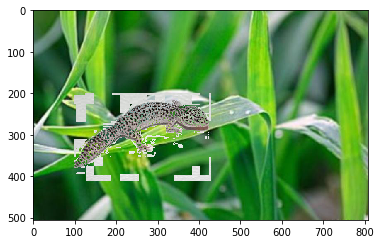

In [488]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
idx = segmentImgClr('images/gecko.jpg', 9, 'hsv')
trImg = transferImg([0,1,2,5,6,7,8], idx, 'images/gecko.jpg', 'images/bg2.jpg')#with HSV

***Segmentation done***
***transfer done


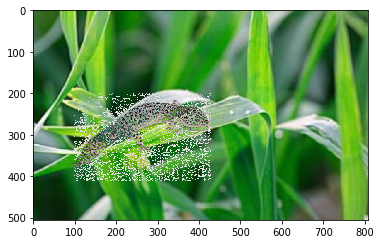

In [503]:
#10 Test with a different colorspace
idx = segmentImgClr('images/gecko.jpg', 9)
trImg = transferImg([1,2,4,6,7,8], idx, 'images/gecko.jpg', 'images/bg2.jpg')#with RGB

***Segmentation done***
***transfer done


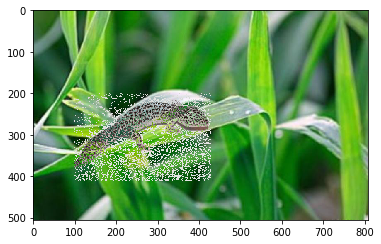

In [521]:
idx = segmentImgClr('images/gecko.jpg', 9, 'lab')
trImg = transferImg([1,2,3,5,8], idx, 'images/gecko.jpg', 'images/bg2.jpg')#with lab